# CAMBIO
Statistical analysis of CAMBI study results.
This workbench is intended to give a first overview of CAMBIO results.
We start from the (preliminary) output data file from CAMBIO. We first iterate over all numerical columns and perform a t test (to compare AMD and Control). We discard data from rows without valid numerical results or that are empty. We do not model left/right eye data, thus, this is just for a very first look and is not intended to be a final analyis. We then perform an analogous analysis on the categorical data using a chi-squared test.

### import necessary Python libraries (our library s called cambio)

In [17]:
from pathlib import Path
import pandas as pd
from statsmodels.stats.multitest import multipletests
from cambio import Cambio
import numpy as np
import matplotlib.pyplot as plt

### Input path to data using dialog

In [2]:
# input() ## enter path to CAMBio_Tabelle

### Convert relative path to absolute path and initialize Cambio object

In [3]:
input_file = "/Users/hannes/Documents/cambio-analysis/2025_07_24_CAMBio_Tabelle_für_Hannes_Urbat.csv"
input_path = Path(input_file).resolve()
cambio = Cambio(cambio_path=input_path)

/Users/hannes/Documents/cambio-analysis/src/cambio/cambio.py:179: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


### Perform t tests on all numerical columns

In [4]:
t_test_d_list = cambio.perform_t_tests()

### Print sorted results

In [5]:
for res in t_test_d_list:
    col = res['column']
    t = res['t_stat']
    p = res['p_val']
    print(f"{col:<20} t={t:>8.4f}  p={p:>10.4g}")
    for group, mean in res['diag']['means'].items():
        std = res['diag']['stds'][group]
        n = res['diag']['n_obs'][group]
        print(f"    {group:<10} mean={mean:.3f}  std={std:.3f}  n={n}")
    print()

Age at Admission     t=  6.4667  p= 4.746e-09
    AMD        mean=79.093  std=5.584  n=43
    Control    mean=70.385  std=7.523  n=52

FI Particle Counts CD9 (fraction of total) t=  2.9345  p=  0.005288
    AMD        mean=0.095  std=0.051  n=27
    Control    mean=0.061  std=0.031  n=23

FI Particle Counts CD81 (fraction of total) t=  2.4085  p=   0.02163
    AMD        mean=0.202  std=0.177  n=28
    Control    mean=0.117  std=0.061  n=26

Fluorescence Intensity C3 CD9 (ExoView) t=  2.2031  p=   0.03164
    AMD        mean=1.059  std=0.042  n=33
    Control    mean=1.039  std=0.029  n=29

Fluorescence per particle FH CD9 (ExoView) t=  2.1309  p=   0.03811
    AMD        mean=187.847  std=145.285  n=34
    Control    mean=127.879  std=70.454  n=29

Height (cm)          t= -2.0692  p=   0.04409
    AMD        mean=162.805  std=26.759  n=43
    Control    mean=171.481  std=6.944  n=52

FI Particle Counts CD41a (fraction of total) t=  2.0160  p=   0.05074
    AMD        mean=0.295  std=0

In [6]:
# Alle getesteten Spaltennamen anzeigen
tested_columns = [res["column"] for res in t_test_d_list]
print("Getestete Variablen:", tested_columns)
print("Anzahl Tests:", len(tested_columns))

# Optional: Spalten nach Eye- und Person-Vars trennen (falls du self.eye_vars / self.person_vars hast)
eye_tested = [col for col in tested_columns if col in cambio.eye_vars]
person_tested = [col for col in tested_columns if col in cambio.person_vars]

print("\nEye-Vars getestet:", eye_tested)
print("Person-Vars getestet:", person_tested)

Getestete Variablen: ['Age at Admission', 'FI Particle Counts CD9 (fraction of total)', 'FI Particle Counts CD81 (fraction of total)', 'Fluorescence Intensity C3 CD9 (ExoView)', 'Fluorescence per particle FH CD9 (ExoView)', 'Height (cm)', 'FI Particle Counts CD41a (fraction of total)', 'Fluorescence per particle FH CD41a (ExoView)', 'C3 Particle Counts CD9 (fraction of total)', 'FI Particle Counts CD63 (fraction of total)', 'Fluorescence per particle C3 CD41a (ExoView)', 'RPE lift (Drusen) area 5 mm circle (mm2)', 'FH Particle Counts CD41a (fraction of total)', 'RPE lift (Drusen) area 3 mm circle (mm2)', 'FH Particle Counts CD81 (fraction of total)', 'Co-Lokalisation Counts FH-C3 CD81 (fraction of total)', 'RPE lift (Drusen) volume 5 mm circle (mm3)', 'Fluorescence Intensity FI CD81 (ExoView)', 'RPE lift (Drusen) volume 3 mm circle (mm3)', 'Co-Lokalisation Counts FI-FH CD9 (fraction of total)', 'Fluorescent Particle Count FI CD81 (ExoView)', 'Co-Lokalisation Counts FH-C3 CD41a (fractio

In [7]:
df_overview = pd.DataFrame([
    {
        "column": res["column"],
        "n_group1": res["diag"]["n_obs"][res["diag"]["group_names"][0]],
        "n_group2": res["diag"]["n_obs"][res["diag"]["group_names"][1]],
        "mean_group1": res["diag"]["means"][res["diag"]["group_names"][0]],
        "mean_group2": res["diag"]["means"][res["diag"]["group_names"][1]],
        "p_value": res["p_val"]
    }
    for res in t_test_d_list
])

df_overview

,column,n_group1,n_group2,mean_group1,mean_group2,p_value
0,Age at Admission,43,52,79.093023,70.384615,4.746430e-09
1,FI Particle Counts CD9 (fraction of total),27,23,0.095140,0.060679,5.287576e-03
2,FI Particle Counts CD81 (fraction of total),28,26,0.202460,0.116965,2.162522e-02
3,Fluorescence Intensity C3 CD9 (ExoView),33,29,1.059161,1.039088,3.163688e-02
4,Fluorescence per particle FH CD9 (ExoView),34,29,187.846972,127.879215,3.811173e-02
...,...,...,...,...,...,...
72,C3 Particle Counts CD63 (fraction of total),24,18,0.773419,0.766268,8.235365e-01
73,Co-Lokalisation Counts FI-C3 CD9 (fraction of ...,27,23,0.002400,0.002274,9.061563e-01
74,Fluorescence per particle FI CD63 (ExoView),31,28,156.324080,158.606916,9.379203e-01
75,Co-Lokalisation Counts FH-C3 CD9 (fraction of ...,27,23,0.001564,0.001527,9.466288e-01


In [8]:
results = cambio.perform_t_tests()

# Ausgabe der ersten paar Ergebnisse inkl. Beobachtungszahlen
for r in results:
    print(f"{r['column']}: {r['diag']['n_obs']}")

Age at Admission: {'AMD': 43, 'Control': 52}
FI Particle Counts CD9 (fraction of total): {'AMD': 27, 'Control': 23}
FI Particle Counts CD81 (fraction of total): {'AMD': 28, 'Control': 26}
Fluorescence Intensity C3 CD9 (ExoView): {'AMD': 33, 'Control': 29}
Fluorescence per particle FH CD9 (ExoView): {'AMD': 34, 'Control': 29}
Height (cm): {'AMD': 43, 'Control': 52}
FI Particle Counts CD41a (fraction of total): {'AMD': 23, 'Control': 18}
Fluorescence per particle FH CD41a (ExoView): {'AMD': 34, 'Control': 29}
C3 Particle Counts CD9 (fraction of total): {'AMD': 27, 'Control': 23}
FI Particle Counts CD63 (fraction of total): {'AMD': 24, 'Control': 18}
Fluorescence per particle C3 CD41a (ExoView): {'AMD': 34, 'Control': 29}
RPE lift (Drusen) area 5 mm circle (mm2): {'AMD': 15, 'Control': 17}
FH Particle Counts CD41a (fraction of total): {'AMD': 24, 'Control': 18}
RPE lift (Drusen) area 3 mm circle (mm2): {'AMD': 15, 'Control': 17}
FH Particle Counts CD81 (fraction of total): {'AMD': 28, 'Co

In [14]:
# Chi²-Tests für alle kategorialen Variablen
chi2_results = cambio.perform_chi2_tests()

In [15]:
# Ausgabe im gleichen Stil wie beim t‑Test
for res in chi2_results:
    print(f"{res['column']:<20} test={res['test']:<12} p={res['p_val']:.4g}")
    print(res['diag']['counts'])  # Kontingenztabelle
    print()

No AMD               test=chi2         p=1.432e-21
No AMD   No  Yes
Group           
AMD      43    0
Control   0   52

Healthy Retina       test=chi2         p=1.653e-20
Healthy Retina  No  Yes
Group                  
AMD             43    0
Control          1   50

Early AMD            test=chi2         p=9.493e-08
Early AMD  No  Yes
Group             
AMD        21   22
Control    51    1

Dry AMD              test=chi2         p=3.109e-05
Dry AMD  No  Yes
Group           
AMD      29   14
Control  52    0

Geographic Atrophy   test=fisher_exact p=0.0004799
Geographic Atrophy  No  Yes
Group                      
AMD                 34    9
Control             52    0

C__26330755_10       test=chi2         p=0.003709
C__26330755_10  C  CG   G
Group                    
AMD             3  26  12
Control         1  17  32

Disease Diabetes     test=chi2         p=0.01784
Disease Diabetes  ?  No  Yes
Group                       
AMD               2  27   14
Control           0  45    7


In [16]:
# Erwartete Anzahl Personen (ein Alias pro Person in person_df)
n_patients = cambio.person_df["Alias"].nunique()

rows = []
cat_person_vars = [
    v for v in cambio.person_vars
    if v in cambio.person_df.columns and cambio._col_type.get(v) == "categorical"
]

for var in cat_person_vars:
    # nur Zeilen, die für den Chi²-Test genutzt würden (Group + Var vorhanden)
    df_used = cambio.person_df[["Alias", "Group", var]].dropna(subset=["Group", var])
    person_rows = len(df_used)
    unique_aliases = df_used["Alias"].nunique()
    group_counts = df_used["Group"].value_counts().to_dict()

    # Plausibilitäts-Checks
    ok_not_exceed = (person_rows <= n_patients) and (unique_aliases <= n_patients)
    ok_no_eye_dup  = (person_rows == unique_aliases)  # jede Person max. 1x gezählt

    rows.append({
        "Variable": var,
        "Zeilen_verwendet": person_rows,
        "Eindeutige_Aliase": unique_aliases,
        "Gruppen": group_counts,
        "OK<=N_Patienten": ok_not_exceed,
        "OK_keine_Augen_Duplikate": ok_no_eye_dup,
    })

check_df = pd.DataFrame(rows).sort_values(["OK<=N_Patienten","OK_keine_Augen_Duplikate","Variable"], ascending=[True,True,True])
check_df

,Variable,Zeilen_verwendet,Eindeutige_Aliase,Gruppen,OK<=N_Patienten,OK_keine_Augen_Duplikate
9,Alcohol Consumption (0-7 days/week),96,96,"{'Control': 52, 'AMD': 43, 'Control (Gliose)': 1}",True,True
6,Birthday,96,96,"{'Control': 52, 'AMD': 43, 'Control (Gliose)': 1}",True,True
62,C__2530382_10,55,55,"{'Control': 30, 'AMD': 25}",True,True
57,C__26330755_10,92,92,"{'Control': 50, 'AMD': 41, 'Control (Gliose)': 1}",True,True
59,C__27473788_10,92,92,"{'Control': 50, 'AMD': 41, 'Control (Gliose)': 1}",True,True
...,...,...,...,...,...,...
41,Other Disease,96,96,"{'Control': 52, 'AMD': 43, 'Control (Gliose)': 1}",True,True
10,Smoking Status,96,96,"{'Control': 52, 'AMD': 43, 'Control (Gliose)': 1}",True,True
0,Status,96,96,"{'Control': 52, 'AMD': 43, 'Control (Gliose)': 1}",True,True
12,Sun Exposure (1-5),96,96,"{'Control': 52, 'AMD': 43, 'Control (Gliose)': 1}",True,True


,column,test,p_val_orig,p_val_corr,significant
0,No AMD,chi2,1.4319e-21,8.5914e-20,True
1,Healthy Retina,chi2,1.6530e-20,4.9589e-19,True
2,Age at Admission,t-test,4.7464e-09,3.6548e-07,True
3,Early AMD,chi2,9.4926e-08,1.8985e-06,True
4,Dry AMD,chi2,3.1093e-05,4.6639e-04,True
...,...,...,...,...,...
132,Co-Lokalisation Counts FI-FH-C3 CD81 (fraction...,t-test,9.5441e-01,9.5441e-01,False
133,Food Fruit,chi2,9.1771e-01,9.6601e-01,False
134,Disease AA Hepatitis,fisher_exact,1.0000e+00,1.0000e+00,False
135,Disease MS,fisher_exact,1.0000e+00,1.0000e+00,False


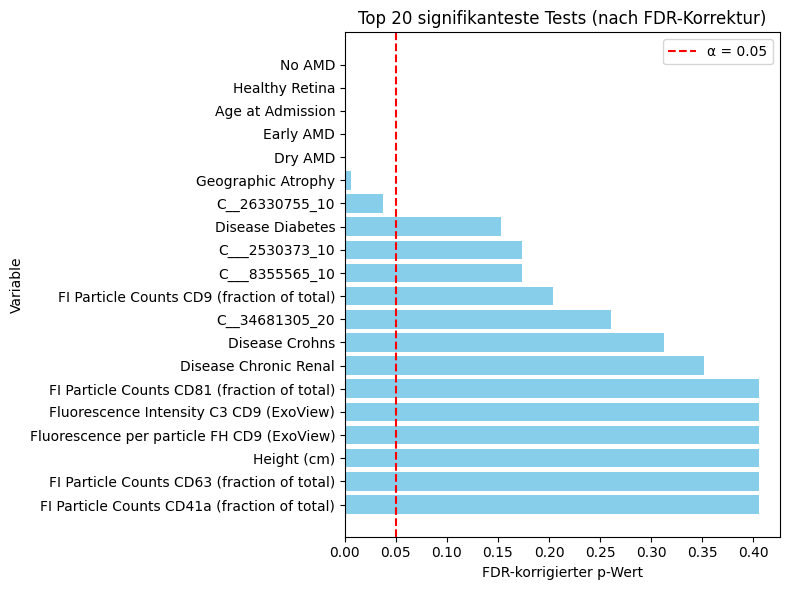

In [18]:
# Annahme: t_test_d_list und chi2_results sind schon vorhanden
t_df = pd.DataFrame(t_test_d_list)
t_df["test"] = "t-test"
t_df["p_val_orig"] = t_df["p_val"]

chi_df = pd.DataFrame(chi2_results)
chi_df["test"] = chi_df["test"].fillna("chi2/fisher")
chi_df["p_val_orig"] = chi_df["p_val"]

# Korrektur für multiples Testen innerhalb jeder Testart
corrected_frames = []
for test_type, sub_df in [("t-test", t_df), ("chi2/fisher", chi_df)]:
    if not sub_df.empty:
        rej, p_corr, _, _ = multipletests(sub_df["p_val_orig"], method="fdr_bh")
        sub_df = sub_df.copy()
        sub_df["p_val_corr"] = p_corr
        sub_df["significant"] = rej
        corrected_frames.append(sub_df)

# Kombinieren
all_results = pd.concat(corrected_frames, ignore_index=True)

# Sortieren nach korrigierten p-Werten
all_results = all_results.sort_values("p_val_corr").reset_index(drop=True)

# Übersichtliche Anzeige
display_cols = ["column", "test", "p_val_orig", "p_val_corr", "significant"]
pd.set_option("display.precision", 4)
display_df = all_results[display_cols]
display(display_df)

# Plot: Top 20 nach korrigiertem p-Wert
top_n = 20
plt.figure(figsize=(8, 6))
plot_df = all_results.nsmallest(top_n, "p_val_corr")
plt.barh(plot_df["column"], plot_df["p_val_corr"], color="skyblue")
plt.axvline(0.05, color="red", linestyle="--", label="α = 0.05")
plt.xlabel("FDR-korrigierter p-Wert")
plt.ylabel("Variable")
plt.title(f"Top {top_n} signifikanteste Tests (nach FDR-Korrektur)")
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()